##**Generating a Clustering Dataset and Implementing the K-Means Algorithm**

---

### **Step 1: Generate a Clustering Dataset**
We will use `make_blobs` from the `sklearn.datasets` module to generate a synthetic clustering dataset.

```python
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Clustering Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
```

---

### **Step 2: Implement K-Means Algorithm**

#### **K-Means Implementation**

```python
from sklearn.cluster import KMeans
import numpy as np

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
y_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
```

---

### **Step 3: Elbow Method for Choosing Optimal K**

The elbow method evaluates the sum of squared distances (inertia) to find the best number of clusters (`k`).

```python
# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()
```

---

### **Step 4: Evaluate Clustering with Silhouette Score**

Silhouette Score measures the quality of clustering, with values ranging from -1 to 1.

```python
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")
```

---


### **Output**
1. **Generated Dataset**: A scatter plot of the synthetic data points.
2. **K-Means Clustering**: A scatter plot showing clustered points and centroids.
3. **Elbow Method Plot**: A line plot showing inertia values for different `k`.
4. **Silhouette Score**: Numerical evaluation of clustering quality.

This implementation demonstrates how to generate data, apply K-Means, and evaluate clustering results effectively.

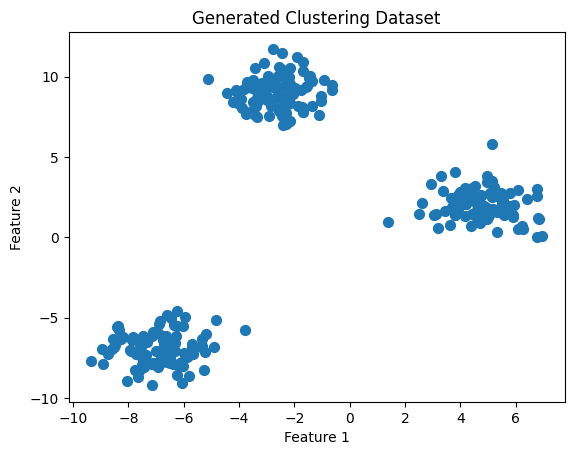

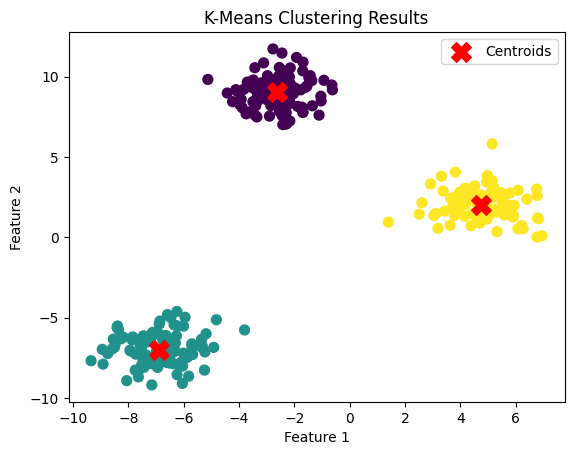

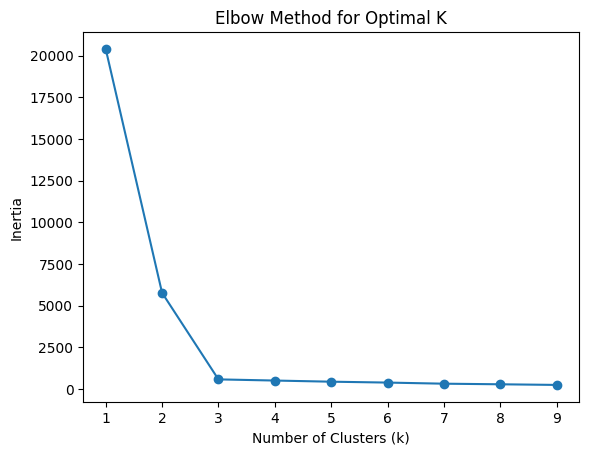

Silhouette Score for K-Means Clustering: 0.85


In [1]:
### **Complete Code**

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Clustering Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Extract cluster labels and centroids
y_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate with Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Evaluate with Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")

### **PAM Algorithm (Partitioning Around Medoids)**

---

#### **Introduction**
The PAM algorithm (Partitioning Around Medoids) is a clustering method similar to K-Means but uses medoids instead of centroids. A **medoid** is a representative data point within a cluster, minimizing the sum of distances to other points in the same cluster. Unlike centroids, medoids are actual data points, making PAM robust to outliers and noise.

---

### **Steps of the PAM Algorithm**
1. **Initialization**:
   - Select \( $k$ \) initial medoids randomly from the dataset.

2. **Assignment**:
   - Assign each data point to the nearest medoid based on a distance metric (e.g., Euclidean distance).

3. **Optimization**:
   - For each medoid, evaluate the cost of swapping it with any non-medoid point.
   - The cost is the change in total distance (objective function) if the medoid is swapped.

4. **Update**:
   - Replace the current medoid with the non-medoid point that reduces the cost the most.
   - Repeat the assignment and optimization steps until medoids stabilize.

5. **Output**:
   - Final clusters and their medoids.

---

### **Advantages**
- Handles outliers better than K-Means since medoids are robust to noise.
- Works well with arbitrary distance metrics (not limited to Euclidean distance).

---

### **Disadvantages**
- Computationally expensive for large datasets due to pairwise distance calculations.
- Slower than K-Means for high-dimensional data.

---

### **Applications**
- Bioinformatics (e.g., clustering gene expression data).
- Image segmentation.
- Anomaly detection in financial transactions.

---

### **Python Implementation of PAM Algorithm**

The PAM algorithm is not directly implemented in `sklearn`, but the `pyclustering` library provides a PAM implementation.

---

#### **Step 1: Install Pyclustering**
```bash
pip install pyclustering
```

---

#### **Step 2: Generate Synthetic Dataset**
```python
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
```

---

#### **Step 3: Apply PAM Algorithm**

```python
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(X)

# Initial medoids (randomly select points)
initial_medoids = [0, 100, 200]  # Indices of initial medoids

# Create PAM model
pam_model = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')

# Perform clustering
pam_model.process()
clusters = pam_model.get_clusters()
medoids = pam_model.get_medoids()

# Visualize the clustering results
for cluster in clusters:
    plt.scatter(X[cluster, 0], X[cluster, 1], s=50)
plt.scatter(X[medoids, 0], X[medoids, 1], s=200, c='red', marker='X', label='Medoids')
plt.title("PAM Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
```

---

### **Step 4: Evaluate Clustering**

#### Silhouette Score
```python
from sklearn.metrics import silhouette_score

# Assign labels to all points
labels = np.zeros(len(X))
for cluster_idx, cluster in enumerate(clusters):
    for point_idx in cluster:
        labels[point_idx] = cluster_idx

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for PAM Clustering: {sil_score:.2f}")
```
---

### **Output**
1. **Generated Dataset**: A scatter plot of synthetic data points.
2. **PAM Clustering Results**: A scatter plot of clusters with medoids marked.
3. **Silhouette Score**: Numerical evaluation of clustering quality.

PAM is effective for smaller datasets and scenarios where robustness to outliers is important. However, for larger datasets, consider algorithms like K-Medoids++ or CLARA (Clustering Large Applications).

In [3]:
#### **Step 1: Install Pyclustering**
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=8885e36aaa9a5c118b5489feb7a5b689c473fc8274ffd8706f6cdccc88682267
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


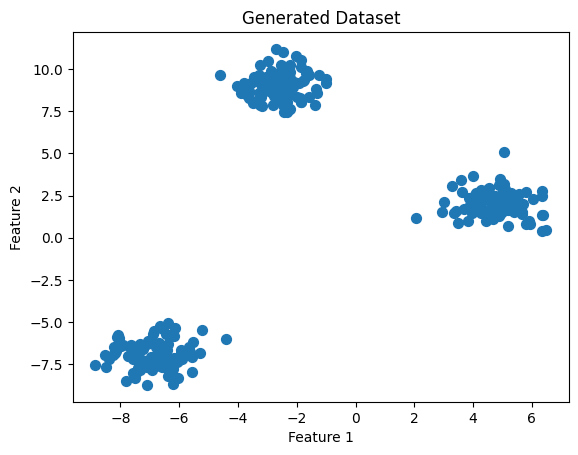

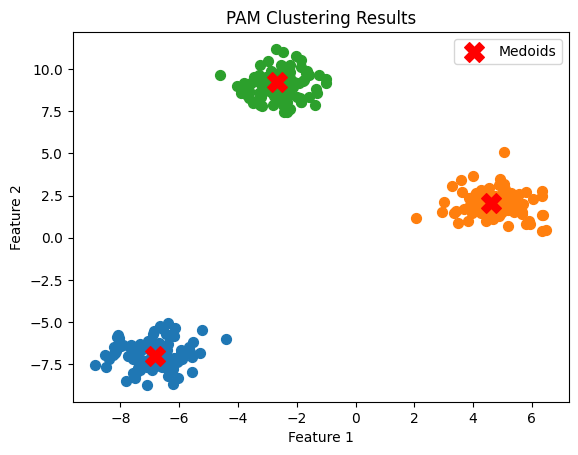

Silhouette Score for PAM Clustering: 0.88


In [4]:
### **Complete Code**
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Compute distance matrix
distance_matrix = calculate_distance_matrix(X)

# Step 3: Apply PAM algorithm
initial_medoids = [0, 100, 200]  # Initial medoid indices
pam_model = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
pam_model.process()

clusters = pam_model.get_clusters()
medoids = pam_model.get_medoids()

# Step 4: Visualize clusters and medoids
for cluster in clusters:
    plt.scatter(X[cluster, 0], X[cluster, 1], s=50)
plt.scatter(X[medoids, 0], X[medoids, 1], s=200, c='red', marker='X', label='Medoids')
plt.title("PAM Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 5: Evaluate clustering
labels = np.zeros(len(X))
for cluster_idx, cluster in enumerate(clusters):
    for point_idx in cluster:
        labels[point_idx] = cluster_idx

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for PAM Clustering: {sil_score:.2f}")


##**Hierarchical Clustering: Linkage Metrics**

---

#### **Introduction**
Hierarchical clustering is a method of clustering data into a hierarchy of clusters. It can be visualized using a **dendrogram**, which represents how clusters are merged or split at each step.

There are two types of hierarchical clustering:
1. **Agglomerative Hierarchical Clustering (AHC)**: A bottom-up approach where each data point starts as its own cluster, and clusters are iteratively merged.
2. **Divisive Hierarchical Clustering**: A top-down approach where all points start in one cluster, and clusters are iteratively split.

Linkage metrics determine how the distance between clusters is calculated at each step of the hierarchical clustering process.

---

### **Linkage Metrics**

1. **Single Linkage (Minimum Distance)**
   - Distance between two clusters is the shortest distance between any two points in the clusters.
   - Formula:
     \[
     $d(C_i, C_j) = \min_{x \in C_i, y \in C_j} \text{distance}(x, y)$
     \]
   - **Characteristics**:
     - Tends to create elongated clusters.
     - Sensitive to noise and outliers.

2. **Complete Linkage (Maximum Distance)**
   - Distance between two clusters is the longest distance between any two points in the clusters.
   - Formula:
     \[
     $d(C_i, C_j) = \max_{x \in C_i, y \in C_j} \text{distance}(x, y)$
     \]
   - **Characteristics**:
     - Tends to create compact, spherical clusters.
     - Less sensitive to outliers compared to single linkage.

3. **Average Linkage**
   - Distance between two clusters is the average distance between all pairs of points from the two clusters.
   - Formula:
     \[
     $d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} \text{distance}(x, y)$
     \]
   - **Characteristics**:
     - Balances between single and complete linkage.
     - Produces clusters that are more balanced in size.

4. **Centroid Linkage**
   - Distance between two clusters is the distance between their centroids (mean points).
   - Formula:
     \[
     $d(C_i, C_j) = \text{distance}(\text{centroid of } C_i, \text{centroid of } C_j)$
     \]
   - **Characteristics**:
     - Sensitive to outliers.
     - May not guarantee monotonicity in the dendrogram.

5. **Ward's Linkage**
   - Minimizes the increase in variance when merging two clusters.
   - Merges clusters that lead to the smallest increase in total within-cluster variance.
   - Formula:
     \[
     $d(C_i, C_j) = \frac{|C_i| \cdot |C_j|}{|C_i| + |C_j|} \cdot \|\text{centroid}(C_i) - \text{centroid}(C_j)\|^2$
     \]
   - **Characteristics**:
     - Tends to create compact and spherical clusters.
     - Most commonly used due to its effectiveness in many applications.

---

### **Comparison of Linkage Metrics**

| **Metric**         | **Computation**       | **Shape of Clusters** | **Sensitivity to Outliers** |
|---------------------|-----------------------|------------------------|-----------------------------|
| Single Linkage      | Minimum distance      | Elongated             | High                        |
| Complete Linkage    | Maximum distance      | Compact               | Moderate                    |
| Average Linkage     | Average distance      | Balanced              | Moderate                    |
| Centroid Linkage    | Distance of centroids | Compact               | High                        |
| Ward's Linkage      | Variance-based        | Compact and spherical | Low                         |

---

### **Use Cases of Linkage Metrics**
1. **Single Linkage**:
   - Ideal for detecting long, chain-like clusters.
   - Used in geographical applications (e.g., clustering along rivers).

2. **Complete Linkage**:
   - Suitable when compactness of clusters is desired.
   - Used in customer segmentation.

3. **Average Linkage**:
   - Balanced approach for general-purpose clustering.
   - Used in biology (e.g., phylogenetic trees).

4. **Centroid Linkage**:
   - Applicable when centroid distances are meaningful.
   - Used in document clustering.

5. **Ward's Linkage**:
   - Effective for compact and spherical clusters.
   - Commonly used in image segmentation and marketing.

---

Hierarchical clustering provides a versatile framework for grouping data, and the choice of linkage metric depends on the application and the desired cluster properties.

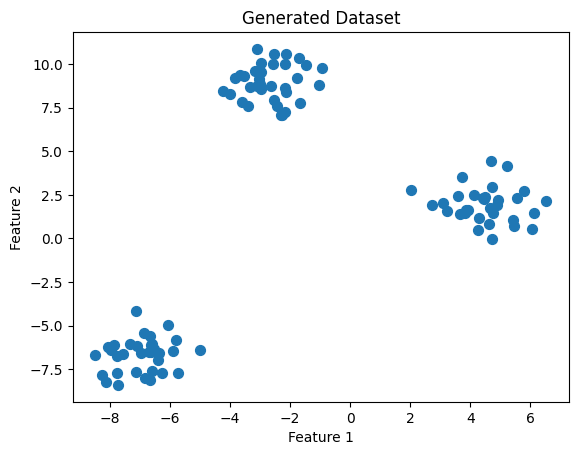

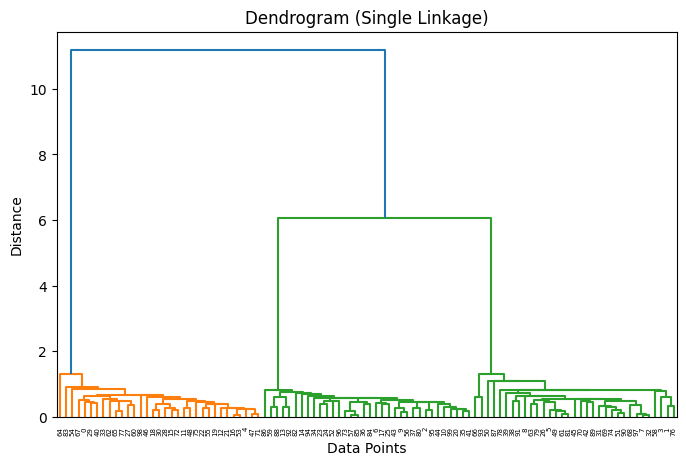

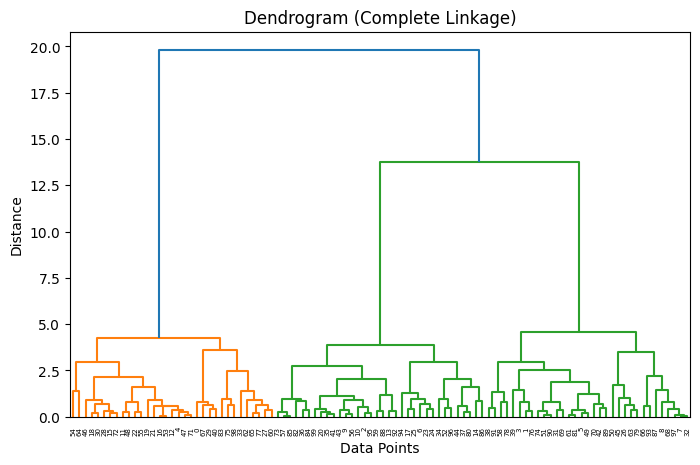

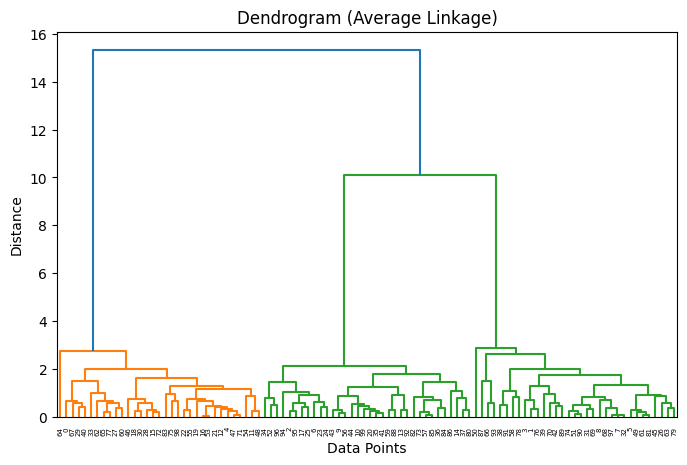

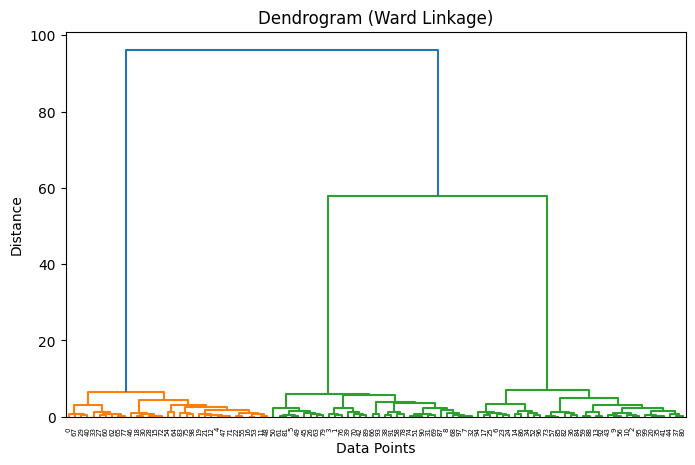

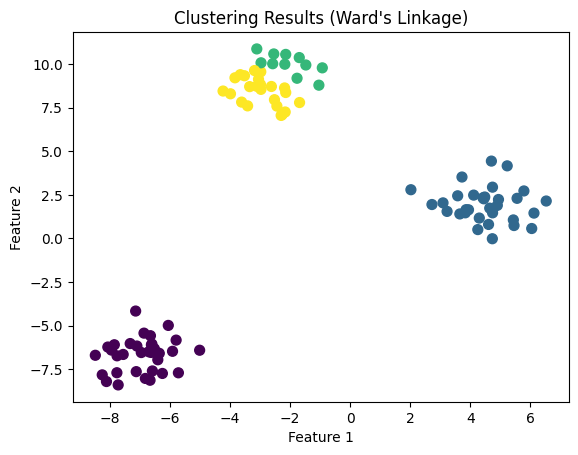

In [1]:
### **Python Implementation of Linkage Metrics**

#### Step 1: Import Libraries and Generate Data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Step 2: Perform Hierarchical Clustering Using Different Linkages

# Linkage methods: single, complete, average, ward
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    plt.figure(figsize=(8, 5))
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

### **Step 3: Cluster Assignments**
#You can cut the dendrogram at a specific threshold to determine the number of clusters:

from scipy.cluster.hierarchy import fcluster

# Ward's linkage example
Z = linkage(X, method='ward')
# Assign clusters by cutting the dendrogram at height 7
clusters = fcluster(Z, t=7, criterion='distance')

# Visualize clustering results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clustering Results (Ward's Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

---

#### **Introduction**
BIRCH is a clustering algorithm designed for large datasets. It builds a hierarchical tree structure called a **Clustering Feature (CF) Tree** to summarize data, allowing efficient and scalable clustering. BIRCH is particularly well-suited for handling massive datasets where other clustering methods may struggle due to memory or computational constraints.

---

### **Key Concepts in BIRCH**

1. **Clustering Feature (CF):**
   - A **CF** is a triplet summarizing a cluster:
     - \( N \): Number of data points in the cluster.
     - \( LS \): Linear sum of data points in the cluster.
     - \( SS \): Squared sum of data points in the cluster.
   - With \( N \), \( LS \), and \( SS \), the centroid and radius of a cluster can be computed.

   **Formulas**:
   - Centroid: \( \mu = \frac{LS}{N} \)
   - Radius: \( R = \sqrt{\frac{SS}{N} - \left(\frac{LS}{N}\right)^2} \)

2. **CF Tree**:
   - A tree structure used to store CFs in a compact way.
   - It has the following components:
     - **Leaf nodes**: Contain CFs and point to clusters.
     - **Non-leaf nodes**: Contain summaries of their children.
   - Parameters:
     - **Branching factor (B)**: Maximum number of children per node.
     - **Threshold (T)**: Maximum radius of a cluster at the leaf level.

3. **Steps in BIRCH**:
   - **Incremental Data Summarization**:
     - Insert data points into the CF tree, adjusting nodes as necessary.
   - **Clustering**:
     - Perform global or local clustering using a simpler algorithm like K-Means on the leaf nodes.

---

### **Advantages**
- Handles large datasets efficiently.
- Works incrementally, so it can process streaming data.
- Memory-efficient due to the CF Tree's summarization.

### **Disadvantages**
- Sensitive to the choice of parameters (threshold \( T \), branching factor \( B \)).
- Performs better on spherical clusters.

---



### **Key Observations**
1. **Threshold Parameter**: Smaller thresholds result in finer granularity (more clusters), while larger thresholds may merge distinct clusters.
2. **Number of Clusters**: You can set `n_clusters=None` to let BIRCH automatically determine the number of clusters.

---

### **Applications of BIRCH**
1. **Customer Segmentation**: Efficiently cluster millions of customer profiles.
2. **Network Traffic Analysis**: Detect patterns in large-scale data streams.
3. **Geospatial Data**: Cluster large geospatial datasets for regional analysis.

BIRCH remains a go-to algorithm for scalable and efficient clustering in large datasets.

In [5]:
### **Python Implementation of BIRCH**

#### Step 1: Install Required Libraries
#Ensure you have `scikit-learn` installed:
!pip install scikit-learn


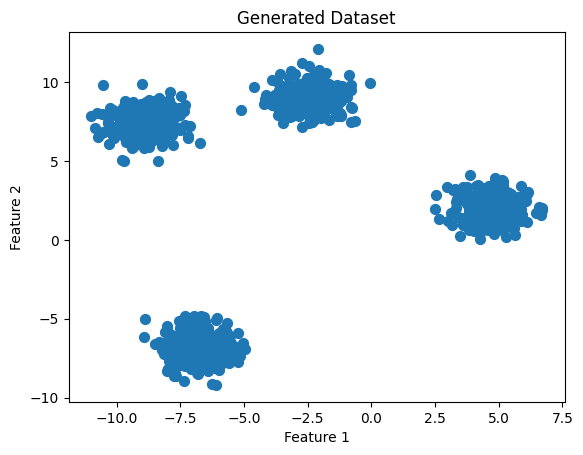

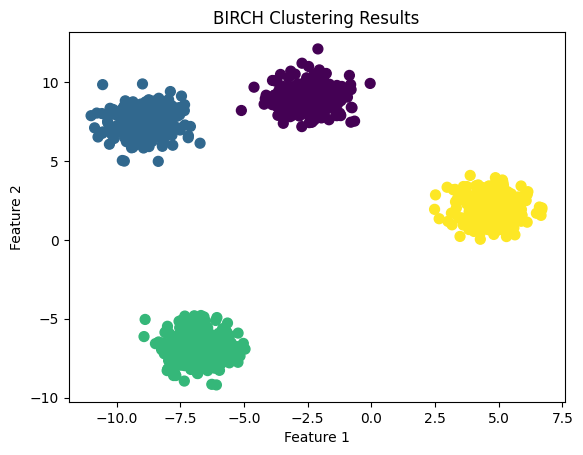

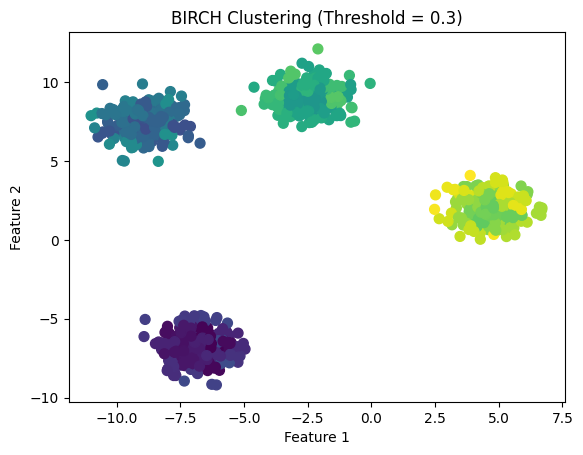

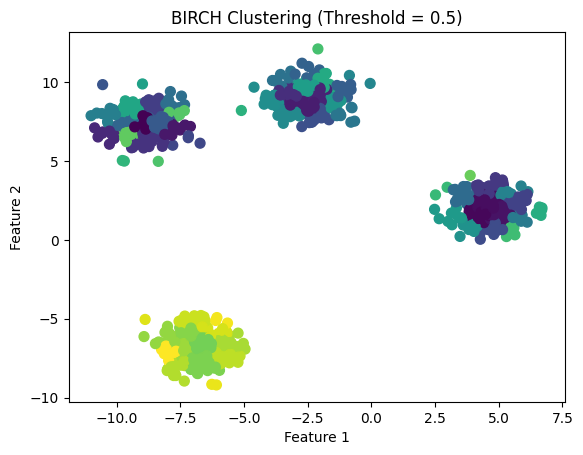

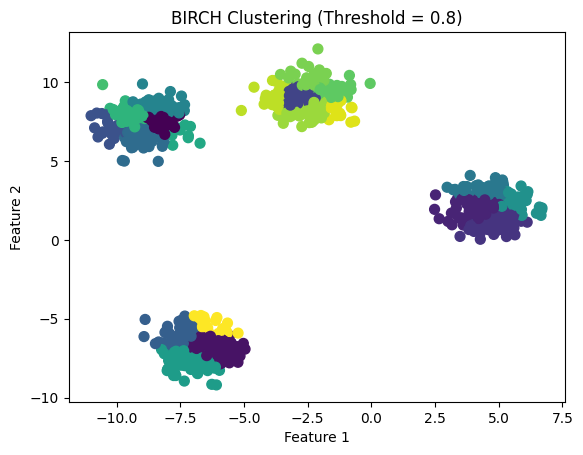

Silhouette Score for BIRCH Clustering: 0.30


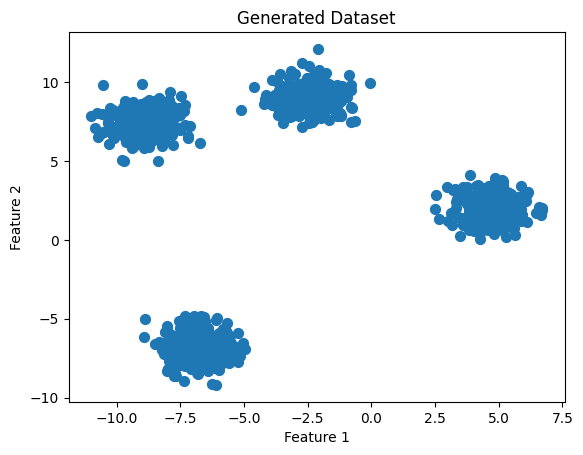

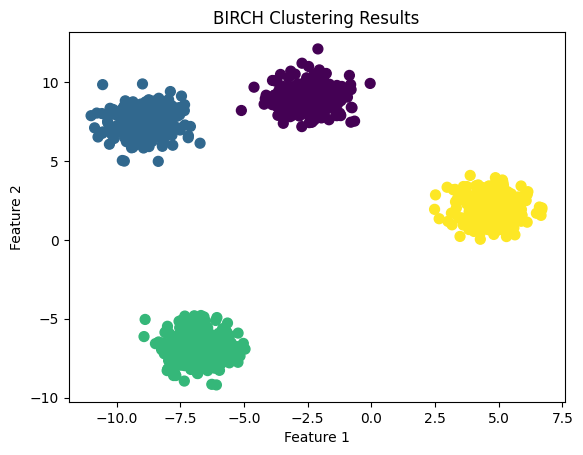

Silhouette Score for BIRCH Clustering: 0.83


In [6]:
#### Step 2: Generate a Synthetic Dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.8, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Step 3: Apply BIRCH Clustering
from sklearn.cluster import Birch

# Apply BIRCH with a threshold of 0.5 and 4 clusters
birch = Birch(threshold=0.5, n_clusters=4)
birch.fit(X)

# Extract cluster labels
labels = birch.labels_

# Visualize clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("BIRCH Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Step 4: Experiment with Different Parameters
# Experiment with different thresholds
thresholds = [0.3, 0.5, 0.8]
for t in thresholds:
    birch = Birch(threshold=t, n_clusters=None)  # Automatic cluster determination
    birch.fit(X)
    labels = birch.labels_

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"BIRCH Clustering (Threshold = {t})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### **Evaluation of BIRCH Clustering**

#### Silhouette Score
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for BIRCH Clustering: {sil_score:.2f}")

### **Complete Code**
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.8, random_state=42)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply BIRCH clustering
birch = Birch(threshold=0.5, n_clusters=4)
birch.fit(X)

# Extract cluster labels
labels = birch.labels_

# Visualize clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("BIRCH Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate clustering
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for BIRCH Clustering: {sil_score:.2f}")

### **Density-Based Clustering Methods**

---

#### **Introduction**
Density-based clustering methods identify clusters as dense regions of data points separated by regions of lower density. These methods are particularly effective for datasets with irregularly shaped clusters or noise. Unlike centroid-based methods like K-Means, density-based approaches do not require specifying the number of clusters in advance.

---

### **Key Density-Based Clustering Algorithms**

#### 1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

- **Key Concepts**:
  - A cluster is a dense group of data points.
  - Points are classified as:
    - **Core Points**: Points with at least `minPts` neighbors within a distance `eps`.
    - **Border Points**: Points that are neighbors of a core point but have fewer than `minPts` neighbors themselves.
    - **Noise Points**: Points that are neither core points nor border points.
  - Parameters:
    - `eps`: Maximum radius of a neighborhood.
    - `minPts`: Minimum number of points in a neighborhood to form a dense region.
  
- **Strengths**:
  - Handles noise and outliers well.
  - Detects clusters of arbitrary shapes.

- **Weaknesses**:
  - Sensitive to the choice of `eps` and `minPts`.
  - Struggles with varying cluster densities.

---

#### 2. **OPTICS (Ordering Points To Identify Clustering Structure)**

- **Key Concepts**:
  - Extends DBSCAN by detecting clusters with varying densities.
  - Generates an ordering of points based on density reachability.
  - Does not require a fixed `eps` value.
  
- **Strengths**:
  - Handles varying density better than DBSCAN.
  - Can be visualized using reachability plots.

- **Weaknesses**:
  - More computationally intensive than DBSCAN.



#### 3. **Mean-Shift Clustering**

- **Key Concepts**:
  - A centroid-based clustering algorithm that iteratively shifts data points toward the mode (densest part) of their local neighborhood.
  - No need to specify the number of clusters.
  - Bandwidth parameter determines the neighborhood size.

- **Strengths**:
  - Automatically determines the number of clusters.
  - Handles non-linear cluster shapes.

- **Weaknesses**:
  - Computationally expensive for large datasets.
  - Sensitive to the choice of bandwidth.

### **Comparison of Density-Based Methods**

| **Algorithm** | **Strengths**                                  | **Weaknesses**                                | **Best Use Case**                    |
|---------------|------------------------------------------------|-----------------------------------------------|---------------------------------------|
| **DBSCAN**    | Handles noise, finds arbitrary shapes, fast.   | Struggles with varying densities.             | Outlier detection, simple datasets.  |
| **OPTICS**    | Handles varying densities.                     | Computationally intensive.                    | Complex density structures.          |
| **Mean-Shift**| No need to predefine cluster number.            | Expensive, sensitive to bandwidth.            | Nonlinear clusters in small datasets.|

---



3. **Noise Handling**:
   Evaluate how well the method identifies noise points.

---

### **Applications of Density-Based Clustering**
1. **Geospatial Data**: Identifying densely populated regions or hotspots.
2. **Image Processing**: Segmenting objects in an image.
3. **Anomaly Detection**: Detecting outliers in financial or sensor data.
4. **Biology**: Clustering gene expression data with noise.

---

### **Conclusion**

Density-based clustering methods like DBSCAN, OPTICS, and Mean-Shift provide flexible and robust tools for clustering data, especially when dealing with noise or non-spherical clusters. The choice of algorithm depends on the dataset size, cluster density variation, and computational resources.

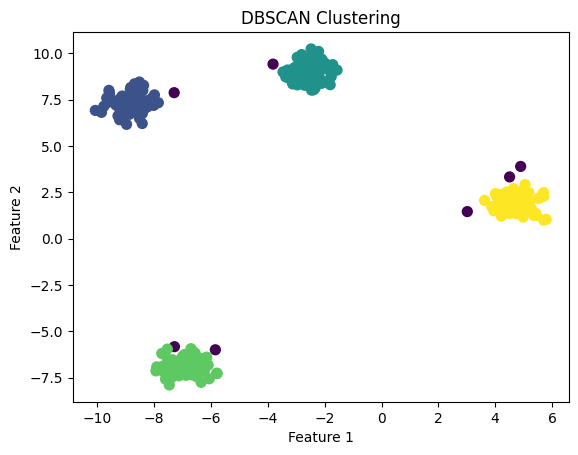

In [8]:
#**Python Implementation**:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

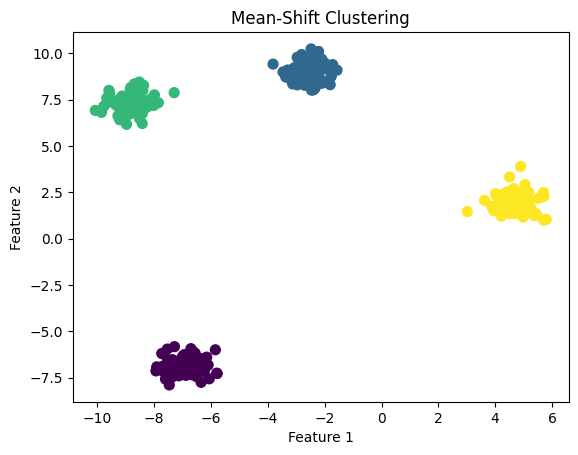

In [10]:
#**Python Implementation**:

from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Apply Mean-Shift
meanshift = MeanShift(bandwidth=bandwidth)
labels = meanshift.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Mean-Shift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

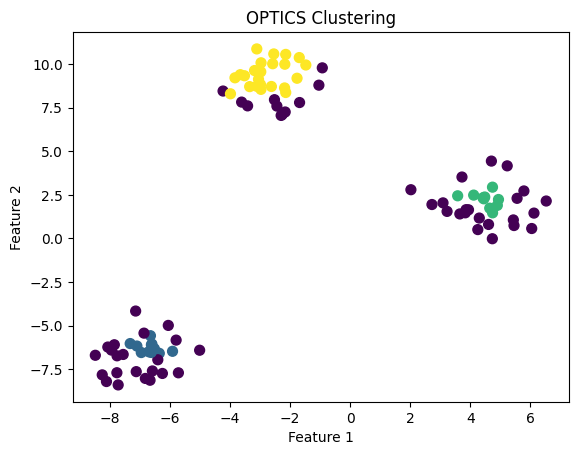

In [4]:
#**Python Implementation**:
from sklearn.cluster import OPTICS
# Apply OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [11]:
### **Evaluation of Density-Based Clustering**

#### Metrics for Evaluation:
#1. **Silhouette Score**:
#   Measures how similar points are within a cluster compared to other clusters.

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")

#2. **Adjusted Rand Index (ARI)**:
#Compares clustering results to ground truth labels.

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index: {ari:.2f}")

Silhouette Score: 0.90
Adjusted Rand Index: 1.00


### **Grid-Based Clustering Methods**

---

#### **Introduction**
Grid-based clustering methods divide the data space into a finite number of cells (grid structure) and perform clustering on these cells instead of directly on data points. These methods are particularly efficient for large datasets, as they reduce computational complexity by summarizing the data into grids.

---

### **Key Features of Grid-Based Methods**
1. **Data Space Division**:
   - The feature space is divided into a grid of finite cells.
   - Each cell is treated as a unit for clustering.
   
2. **Cluster Formation**:
   - Dense cells (cells with a significant number of data points) are identified.
   - Neighboring dense cells are merged to form clusters.

3. **Efficiency**:
   - Computational cost depends on the number of grid cells, not the number of data points.

---

### **Examples of Grid-Based Clustering Algorithms**

#### 1. **STING (Statistical Information Grid Approach)**

- **Overview**:
  - Hierarchical grid-based clustering algorithm.
  - Divides the data space into hierarchical rectangular grids.
  - Uses statistical measures (e.g., mean, variance) stored in grid cells.

- **Process**:
  1. Divide the data space into a hierarchical structure of grids.
  2. Compute statistical measures for each grid.
  3. Merge grids with similar statistics to form clusters.

- **Strengths**:
  - Handles large datasets efficiently.
  - Supports multi-resolution analysis.

- **Weaknesses**:
  - Grid boundaries can lead to inaccuracies.

---

#### 2. **CLIQUE (Clustering in Quest)**

- **Overview**:
  - A density-based grid clustering algorithm that works on subspaces of high-dimensional data.
  - Combines grid-based clustering with subspace clustering.

- **Process**:
  1. Divide the data space into equal-sized grid cells.
  2. Identify dense cells in each dimension.
  3. Combine dense cells across dimensions to form clusters.

- **Strengths**:
  - Handles high-dimensional data.
  - Finds clusters in subspaces.

- **Weaknesses**:
  - Sensitive to the choice of grid size.

---

#### 3. **WaveCluster**

- **Overview**:
  - A wavelet-based grid clustering algorithm.
  - Uses wavelet transforms to identify dense regions.

- **Process**:
  1. Apply wavelet transforms to the data space.
  2. Identify dense regions in the transformed space.
  3. Map the dense regions back to the original space.

- **Strengths**:
  - Handles noise effectively.
  - Suitable for clusters of arbitrary shapes.

- **Weaknesses**:
  - Requires careful selection of wavelet parameters.

---

### **Advantages of Grid-Based Methods**

1. **Scalability**:
   - Efficient for large datasets due to grid-based summarization.

2. **Independence from Data Size**:
   - Computational complexity depends on the number of cells, not data points.

3. **Flexibility**:
   - Can be combined with other clustering methods (e.g., density-based).

---

### **Disadvantages of Grid-Based Methods**

1. **Grid Resolution Sensitivity**:
   - Results depend on the size and boundaries of the grid cells.

2. **Loss of Precision**:
   - Summarizing data into grids may lead to loss of detail.

3. **Fixed Grid Size**:
   - Predefined grid sizes may not adapt well to varying data densities.

---

### **Applications of Grid-Based Clustering**

1. **Geospatial Data Analysis**:
   - Identify dense regions in geospatial datasets (e.g., hotspots in traffic data).

2. **Image Processing**:
   - Detect dense pixel regions in images.

3. **Environmental Data**:
   - Cluster sensor data for weather or pollution monitoring.

4. **High-Dimensional Data**:
   - Analyze high-dimensional datasets using subspace clustering (e.g., CLIQUE).

---

Grid-based clustering is an efficient and scalable approach to clustering large datasets, particularly when memory and computational resources are limited. Combining grid-based methods with other approaches (e.g., density-based methods) often leads to better results in complex datasets.

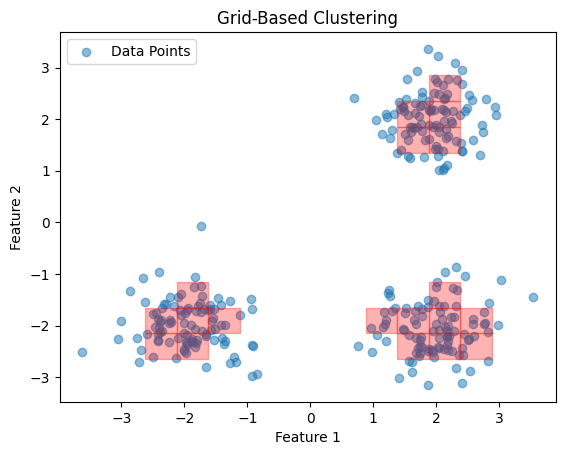

In [12]:
### **Python Implementation of Grid-Based Clustering**

#### Example: Simulating a Basic Grid-Based Clustering

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
data = np.vstack([
    np.random.randn(100, 2) * 0.5 + [2, 2],
    np.random.randn(100, 2) * 0.5 + [-2, -2],
    np.random.randn(100, 2) * 0.5 + [2, -2],
])

# Define grid parameters
grid_size = 0.5
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

# Create grid
x_bins = np.arange(x_min, x_max, grid_size)
y_bins = np.arange(y_min, y_max, grid_size)

# Assign data points to grid cells
x_indices = np.digitize(data[:, 0], x_bins)
y_indices = np.digitize(data[:, 1], y_bins)

# Create a dictionary to store grid densities
grid_counts = {}
for x, y in zip(x_indices, y_indices):
    grid_counts[(x, y)] = grid_counts.get((x, y), 0) + 1

# Identify dense cells (threshold = 5 points)
dense_cells = {cell for cell, count in grid_counts.items() if count > 5}

# Plot results
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')
for cell in dense_cells:
    plt.gca().add_patch(plt.Rectangle(
        (x_bins[cell[0] - 1], y_bins[cell[1] - 1]),
        grid_size, grid_size,
        color='red', alpha=0.3
    ))

plt.title("Grid-Based Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### **CLIQUE Algorithm (Clustering In QUEst)**

---

#### **Introduction**
CLIQUE is a **grid-based** and **density-based** clustering algorithm designed to handle **high-dimensional data**. It combines the advantages of grid-based clustering (efficiency and scalability) with the ability to find clusters in **subspaces** of high-dimensional datasets. CLIQUE automatically determines the number of clusters and the dimensionality of the subspaces in which they exist.

---

### **Key Concepts**

1. **Grid-Based Clustering**:
   - The data space is divided into equal-sized, axis-aligned hyper-rectangular cells (or grids).
   - Dense regions are identified by the number of data points in a cell exceeding a density threshold.

2. **Subspace Clustering**:
   - CLIQUE identifies clusters in **subspaces** of the data, not just the full-dimensional space.
   - It examines combinations of dimensions to detect clusters.

3. **Automatic Cluster Discovery**:
   - CLIQUE does not require the number of clusters to be predefined.
   - Dense regions and their subspaces are identified automatically.

4. **Interpretability**:
   - Since the clusters are aligned with grid cells, CLIQUE provides interpretable results for high-dimensional data.

---

### **Steps in the CLIQUE Algorithm**

#### 1. **Data Space Division**:
   - The data space is divided into non-overlapping grid cells of uniform size.
   - The size of each cell is determined by a user-defined parameter \( $\xi$ \) (grid resolution).

#### 2. **Identification of Dense Units**:
   - A cell is considered **dense** if the number of points within it exceeds a user-defined density threshold \( $\tau$ \).

#### 3. **Subspace Search**:
   - CLIQUE starts with 1-dimensional subspaces and iteratively explores higher-dimensional subspaces.
   - Dense regions are combined across dimensions to identify clusters.

#### 4. **Cluster Formation**:
   - Neighboring dense units in the same subspace are merged to form clusters.

#### 5. **Result Interpretation**:
   - The algorithm outputs the clusters and the subspaces in which they exist.

---

### **Advantages of CLIQUE**

1. **Scalability**:
   - Efficiently handles large datasets due to grid-based summarization.

2. **High-Dimensional Clustering**:
   - Capable of finding clusters in subspaces of high-dimensional data.

3. **Automatic Cluster Discovery**:
   - Automatically identifies the number of clusters and relevant subspaces.

4. **Interpretable Results**:
   - Clusters are represented as dense units in specific subspaces.

---

### **Disadvantages of CLIQUE**

1. **Grid Sensitivity**:
   - Results depend on the choice of grid size \( $\xi$ \).
   - Fine grids can lead to over-segmentation, while coarse grids can miss clusters.

2. **Computational Cost**:
   - Subspace search can become expensive for very high-dimensional data.

3. **Boundary Issues**:
   - Clusters near grid boundaries may be split into multiple parts.

---

### **Applications of CLIQUE**

1. **Bioinformatics**:
   - Discovering gene or protein clusters in high-dimensional biological data.
   
2. **Market Basket Analysis**:
   - Identifying purchase patterns in transaction datasets.

3. **Anomaly Detection**:
   - Detecting anomalies in high-dimensional sensor or network data.

4. **Geospatial Analysis**:
   - Identifying dense regions in multi-dimensional geospatial datasets.

---

### **Conclusion**

CLIQUE is a powerful algorithm for handling high-dimensional data, thanks to its ability to find clusters in subspaces and automatically determine cluster structures. However, the choice of grid size \( $\xi$ \) and density threshold \( $\tau$ \) significantly affects the quality of the clustering results.

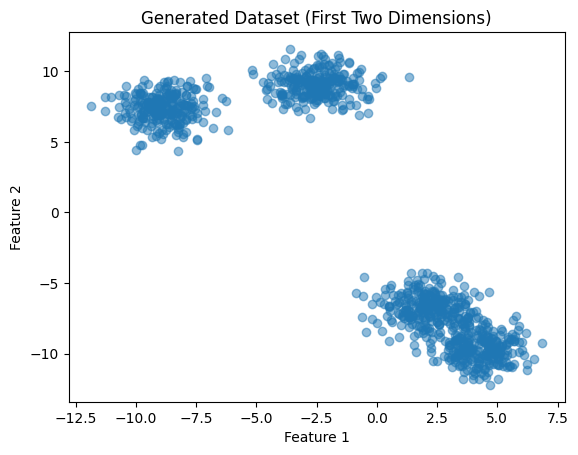

Number of clusters found: 2


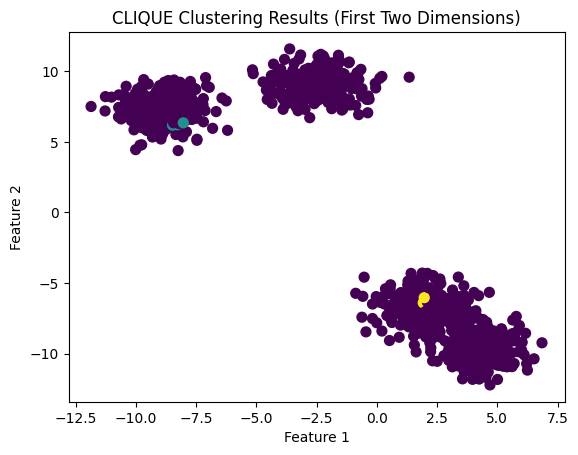

In [13]:
### **Python Implementation of CLIQUE**

#Python does not have a direct implementation of CLIQUE in popular libraries, but it can be implemented using grid-based clustering techniques. Below is an example:

#### **Step 1: Generate High-Dimensional Dataset**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic 3D dataset
X, _ = make_blobs(n_samples=1000, centers=4, n_features=3, random_state=42)

# Visualize the first two dimensions
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Generated Dataset (First Two Dimensions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### **Step 2: Implement CLIQUE**
from collections import defaultdict
import numpy as np

# CLIQUE implementation
def clique_clustering(X, grid_size=0.5, tau=5):
    """
    CLIQUE algorithm for subspace clustering.

    Parameters:
    - X: Dataset (numpy array)
    - grid_size: Size of each grid cell
    - tau: Minimum number of points to consider a cell as dense

    Returns:
    - clusters: List of clusters (each cluster is a list of points)
    """
    # Step 1: Discretize the data into grids
    grid = np.floor(X / grid_size).astype(int)

    # Step 2: Count points in each grid cell
    grid_counts = defaultdict(int)
    for cell in grid:
        grid_counts[tuple(cell)] += 1

    # Step 3: Identify dense cells
    dense_cells = {cell for cell, count in grid_counts.items() if count >= tau}

    # Step 4: Group dense cells into clusters
    clusters = []
    visited = set()

    for cell in dense_cells:
        if cell not in visited:
            # Perform a breadth-first search (BFS) to find connected dense cells
            cluster = []
            queue = [cell]
            while queue:
                current = queue.pop(0)
                if current not in visited:
                    visited.add(current)
                    cluster.append(current)
                    # Check neighbors in the grid space
                    for neighbor in get_neighbors(current):
                        if neighbor in dense_cells and neighbor not in visited:
                            queue.append(neighbor)
            clusters.append(cluster)

    return clusters

def get_neighbors(cell):
    """
    Get neighboring cells in the grid space.
    """
    neighbors = []
    for dim in range(len(cell)):
        for offset in [-1, 0, 1]:
            neighbor = list(cell)
            neighbor[dim] += offset
            neighbors.append(tuple(neighbor))
    return neighbors

# Run CLIQUE
clusters = clique_clustering(X, grid_size=0.5, tau=5)
print(f"Number of clusters found: {len(clusters)}")

#### **Step 3: Visualize Results**

# Assign points to clusters
cluster_labels = np.zeros(X.shape[0])
for i, cluster in enumerate(clusters):
    for cell in cluster:
        points_in_cell = np.where((np.floor(X / 0.5).astype(int) == cell).all(axis=1))[0]
        cluster_labels[points_in_cell] = i + 1

# Visualize the clustering result (first two dimensions)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("CLIQUE Clustering Results (First Two Dimensions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### **Outlier Detection**

---

#### **Introduction**
Outlier detection refers to identifying data points that significantly differ from the rest of the dataset. These unusual observations are also referred to as anomalies or deviations and can arise due to errors, rare events, or underlying variability.

Outlier detection is crucial in various domains such as fraud detection, network security, and quality control.

---

### **Types of Outliers**

1. **Global Outliers**:
   - A single data point significantly deviates from the entire dataset.
   - Example: A customer's transaction amount is 100 times higher than the average.

2. **Contextual Outliers**:
   - A data point is an outlier in a specific context.
   - Example: A high temperature reading might be normal in summer but abnormal in winter.

3. **Collective Outliers**:
   - A group of data points collectively deviates from the rest of the dataset.
   - Example: A sequence of network packets resembling an attack pattern.

---

### **Challenges in Outlier Detection**

1. **High Dimensionality**:
   - In high-dimensional datasets, sparse regions become difficult to define.

2. **Scalability**:
   - Efficient algorithms are needed for large datasets.

3. **Noise**:
   - Differentiating outliers from random noise can be challenging.

4. **Subjectivity**:
   - Outliers depend on the context and application, making it hard to generalize.

---

### **Applications of Outlier Detection**

1. **Fraud Detection**:
   - Identify unusual transactions in financial systems.

2. **Network Security**:
   - Detect anomalies in network traffic indicating potential cyberattacks.

3. **Healthcare**:
   - Identify abnormal health patterns or rare diseases.

4. **Manufacturing**:
   - Detect defects or faults in production lines.

5. **Environmental Monitoring**:
   - Detect unusual patterns in climate or sensor data.

---

Outlier detection is a critical component of data analysis and machine learning pipelines. Selecting the right method depends on the nature of the data and the domain-specific requirements.

In [16]:
### **Methods for Outlier Detection**

#Outlier detection methods can be broadly categorized into:

#### 1. **Statistical Methods**
#   - Based on assumptions about the data's statistical distribution.
#   - Example: Identifying points outside 1.5 times the interquartile range (IQR).

# **Example**:

import numpy as np

# Generate synthetic data
data = [10, 12, 13, 15, 10, 12, 100, 11, 10]

# Calculate IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)


#### 2. **Distance-Based Methods**
#  - Points far away from others are treated as outliers.
# - Example: Using k-Nearest Neighbors (k-NN) to measure distances.

#   **Example**:

from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
data = [[10], [12], [13], [15], [10], [12], [100], [11], [10]]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=2)
outlier_flags = lof.fit_predict(data)
print("Outlier flags:", outlier_flags)  # -1 indicates an outlier

#### 3. **Density-Based Methods**
#  - Outliers are identified in sparse regions of the data space.
#  - Example: DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

# **Example**:

from sklearn.cluster import DBSCAN

# Generate synthetic data
data = [[10], [12], [13], [15], [10], [12], [100], [11], [10]]

# Apply DBSCAN
db = DBSCAN(eps=5, min_samples=2).fit(data)
labels = db.labels_  # -1 indicates noise (outliers)
print("Labels:", labels)

#### 4. **Model-Based Methods**
#  - Use a model to capture normal behavior and identify deviations as outliers.
# - Example: Gaussian Mixture Models (GMM).

#  **Example**:

from sklearn.mixture import GaussianMixture

# Generate synthetic data
data = [[10], [12], [13], [15], [10], [12], [100], [11], [10]]

# Apply GMM
gmm = GaussianMixture(n_components=1).fit(data)
scores = gmm.score_samples(data)
outliers = [i for i, score in enumerate(scores) if score < np.percentile(scores, 10)]
print("Outlier indices:", outliers)


#### 5. **Machine Learning-Based Methods**
# - Leverage unsupervised or semi-supervised learning to detect outliers.
# - Examples:
#  - Isolation Forest
#   - Autoencoders

#  **Example: Isolation Forest**

from sklearn.ensemble import IsolationForest

# Generate synthetic data
data = [[10], [12], [13], [15], [10], [12], [100], [11], [10]]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.1)
outlier_flags = iso.fit_predict(data)
print("Outlier flags:", outlier_flags)  # -1 indicates an outlier


Outliers: [100]
Outlier flags: [ 1  1  1 -1  1  1 -1 -1  1]
Labels: [ 0  0  0  0  0  0 -1  0  0]
Outlier indices: [6]
Outlier flags: [ 1  1  1  1  1  1 -1  1  1]


### **Distribution-Based Outlier Detection**

---

#### **Introduction**
Distribution-based outlier detection identifies anomalies by assuming that data points follow a specific statistical distribution (e.g., Gaussian, Poisson). Points that deviate significantly from this assumed distribution are considered outliers. This method relies on statistical measures like mean, standard deviation, or probability density.

---

### **Key Concepts**

1. **Assumption of Distribution**:
   - The data is assumed to follow a known distribution, such as:
     - **Gaussian (Normal)**: Common in natural datasets.
     - **Poisson**: Suitable for count data.
     - **Exponential**: For inter-event times.

2. **Threshold Definition**:
   - A threshold is set based on probability, z-scores, or confidence intervals.
   - Points outside the threshold are considered outliers.

3. **Parametric Nature**:
   - The method works well for parametric data but may struggle with non-parametric distributions.

---


### **Advantages of Distribution-Based Methods**

1. **Simplicity**:
   - Easy to implement and interpret, especially for Gaussian data.

2. **Efficiency**:
   - Computationally efficient for small datasets or when the distribution is known.

3. **Statistical Rigor**:
   - Based on well-established statistical principles.

---

### **Disadvantages of Distribution-Based Methods**

1. **Assumption Dependency**:
   - Requires the data to follow a specific distribution; performance degrades for non-parametric data.

2. **Sensitivity to Parameters**:
   - Choice of thresholds (e.g., \( k\sigma \)) can significantly impact results.

3. **High Dimensionality**:
   - Hard to apply directly to high-dimensional data without dimensionality reduction.

---

### **Applications of Distribution-Based Outlier Detection**

1. **Finance**:
   - Detect unusual stock prices or transactions.

2. **Healthcare**:
   - Identify abnormal medical test results.

3. **Manufacturing**:
   - Spot deviations in production quality metrics.

4. **Climate Monitoring**:
   - Detect rare weather events.

---

### **Conclusion**

Distribution-based methods are powerful for datasets that align with known statistical distributions. However, in real-world scenarios where data distributions are unknown or non-parametric, alternative methods like distance-based or machine learning techniques may be more effective.

## **Examples of Distribution-Based Methods**

---

#### **1. Gaussian (Normal) Distribution**

- **Approach**:
- Assume the data follows a normal distribution.
- Use the mean \( $\mu$ \) and standard deviation \( $\sigma$ \) to define a range for normal data.
- Data points outside \( $\mu \pm k\sigma$ \) are considered outliers, where \( $k$ \) is a chosen threshold.

In [17]:
# **Implementation**:

import numpy as np

# Generate synthetic data
data = np.random.normal(loc=50, scale=5, size=100)  # Mean=50, Std Dev=5
data = np.append(data, [100, 120])  # Add outliers

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Define thresholds
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)


Outliers: [100.0, 120.0]


#### **2. Z-Score Method**

- **Approach**:
- Calculate the z-score for each data point:  
\( $z = \frac{x - \mu}{\sigma}$ \)
- If \( $|z|$ \) exceeds a chosen threshold (e.g., 3), the point is an outlier.


In [18]:
#- **Implementation**:
from scipy.stats import zscore

# Generate synthetic data
data = np.random.normal(loc=50, scale=5, size=100)
data = np.append(data, [100, 120])  # Add outliers

# Compute z-scores
z_scores = zscore(data)

# Identify outliers
outliers = data[np.abs(z_scores) > 3]
print("Outliers:", outliers)

Outliers: [100. 120.]


In [20]:
#### **3. Probability Density Function (PDF)**

'''- **Approach**:
- Fit a probability distribution to the data.
- Calculate the probability of each data point.
- Points with very low probabilities are considered outliers.'''

#- **Implementation**:

from scipy.stats import norm

# Generate synthetic data
data = np.random.normal(loc=50, scale=5, size=100)
data = np.append(data, [100, 120])  # Add outliers

# Fit Gaussian distribution
mean, std_dev = norm.fit(data)

# Calculate probabilities
probabilities = norm.pdf(data, mean, std_dev)

# Define threshold (e.g., probability < 0.001)
threshold = 0.001
outliers = data[probabilities < threshold]
print("Outliers:", outliers)


Outliers: [100. 120.]


In [21]:
#### **4. Confidence Intervals**

#- **Approach**:
#- Use confidence intervals to define a range for normal data.
#- Points outside the interval are outliers.

#- **Implementation**:

import scipy.stats as stats

# Generate synthetic data
data = np.random.normal(loc=50, scale=5, size=100)
data = np.append(data, [100, 120])  # Add outliers

# Calculate 95% confidence interval
lower_bound, upper_bound = stats.norm.interval(0.95, loc=np.mean(data), scale=np.std(data))

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)

Outliers: [100.0, 120.0]


### **Clustering-Based Outlier Detection**

---

#### **Introduction**
Clustering-based outlier detection uses the principles of clustering to identify anomalies in a dataset. The idea is that outliers do not fit well into any cluster or belong to small, sparse clusters compared to the majority.

Clustering-based methods are effective when the data naturally forms clusters and outliers deviate significantly from these clusters.

---

### **Key Concepts**

1. **Clustering**:
   - Organizes data into groups (clusters) based on similarity.
   - Common algorithms: K-Means, DBSCAN, and Hierarchical Clustering.

2. **Outlier Detection via Clustering**:
   - Outliers are identified as:
     - Points far from cluster centroids.
     - Points in sparse or small clusters.
     - Points labeled as noise (e.g., in DBSCAN).

3. **Flexibility**:
   - Handles both global and local outliers effectively, depending on the clustering algorithm.

---

### **Approaches**



### **Advantages of Clustering-Based Outlier Detection**

1. **Handles Complex Structures**:
   - Works well with non-linear relationships and clusters of arbitrary shapes (e.g., DBSCAN).

2. **Effective for Local Outliers**:
   - Detects outliers in local sparse regions rather than only global deviations.

3. **Scalability**:
   - Efficient for moderate-sized datasets when using clustering algorithms like K-Means.

---

### **Disadvantages of Clustering-Based Outlier Detection**

1. **Parameter Sensitivity**:
   - Performance depends heavily on hyperparameters (e.g., number of clusters in K-Means, \( \epsilon \) and minPts in DBSCAN).

2. **Computational Cost**:
   - Hierarchical methods are computationally expensive for large datasets.

3. **Cluster Size Bias**:
   - May incorrectly treat points in small legitimate clusters as outliers.

---

### **Applications of Clustering-Based Outlier Detection**

1. **Fraud Detection**:
   - Detect fraudulent transactions or behaviors that do not fit established patterns.

2. **Network Security**:
   - Identify unusual activity in network traffic.

3. **Anomaly Detection in Manufacturing**:
   - Detect defective products in production lines.

4. **Customer Segmentation**:
   - Spot rare customer behaviors or preferences.

---

### **Conclusion**
Clustering-based outlier detection is a versatile approach that combines the benefits of clustering algorithms with anomaly detection. The choice of clustering method depends on the dataset's structure and the specific requirements of the application.

#### **1. Using K-Means**
- **Idea**:
  - Points far from the nearest cluster centroid (measured using distance) are considered outliers.
- **Steps**:
  1. Perform K-Means clustering.
  2. Compute the distance of each point to its nearest cluster centroid.
  3. Define a threshold; points with distances above this threshold are outliers.

In [22]:
#**Implementation**:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
outlier_points = np.array([[10, 10], [12, 12]])  # Add some outliers
data = np.vstack([data, outlier_points])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
distances = np.min(kmeans.transform(data), axis=1)

# Define a threshold for outliers
threshold = np.percentile(distances, 95)
outliers = data[distances > threshold]

# Results
print("Outliers:\n", outliers)

Outliers:
 [[-1.92234053 11.20474175]
 [ 5.15492652  5.82590117]
 [ 6.77291221  0.02108188]
 [-3.80074638 -5.76053468]
 [-4.81887927 -5.12476875]
 [-5.12894273  9.83618863]
 [-2.44896741 11.47752824]
 [-2.77385446 11.73445529]
 [-9.35127169 -7.67700485]
 [ 1.3986115   0.94878204]
 [-6.24684533 -4.60941674]
 [ 2.51598311  1.44741466]
 [ 6.9545374   0.10590449]
 [ 3.19179449  0.56570591]
 [10.         10.        ]
 [12.         12.        ]]


#### **2. Using DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- **Idea**:
  - DBSCAN labels points as:
    - **Core points**: High-density regions.
    - **Border points**: Near dense regions.
    - **Noise**: Points not part of any cluster (considered outliers).
- **Steps**:
  1. Apply DBSCAN clustering.
  2. Identify points labeled as noise (\(-1\)).

In [25]:
#**Implementation**:

from sklearn.cluster import DBSCAN
# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
outlier_points = np.array([[10, 10], [12, 12]])  # Add some outliers
data = np.vstack([data, outlier_points])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

# Identify outliers
outliers = data[labels == -1]

# Results
print("Outliers:\n", outliers)

Outliers:
 [[-8.91775173 -7.8881959 ]
 [-3.11090424 10.86656431]
 [ 2.61473625  2.159624  ]
 [-1.92234053 11.20474175]
 [ 3.82165815  4.06555696]
 [-8.39481825 -5.51323533]
 [ 6.22589565  0.73535419]
 [-6.88759983 -5.40016545]
 [-1.03130358  8.49601591]
 [ 5.15492652  5.82590117]
 [ 6.77291221  0.02108188]
 [-3.80074638 -5.76053468]
 [-5.8212027  -8.63884908]
 [-0.64342311  9.48811905]
 [ 6.40533308  2.37815139]
 [ 6.79306129  1.20582212]
 [ 5.32613903  0.36045381]
 [ 2.92674431  3.32704206]
 [ 3.63386145  0.75898107]
 [-1.10640331  7.61243507]
 [-4.23411546  8.4519986 ]
 [-3.98771961  8.29444192]
 [-4.81887927 -5.12476875]
 [-8.41374136 -5.60243277]
 [-6.24103473 -8.54162966]
 [-5.12894273  9.83618863]
 [-2.44896741 11.47752824]
 [-3.42862186 10.56422053]
 [-2.77385446 11.73445529]
 [ 6.76203503  3.00563494]
 [ 6.27229014  0.54302831]
 [-9.35127169 -7.67700485]
 [-1.04354885  8.78850983]
 [ 1.3986115   0.94878204]
 [-5.25101165 -8.26021105]
 [ 3.31964563  3.80462845]
 [ 6.78382293  2.

#### **3. Using Hierarchical Clustering**
- **Idea**:
  - Small clusters or singleton clusters (clusters with only one data point) are treated as outliers.
- **Steps**:
  1. Perform hierarchical clustering.
  2. Examine cluster sizes to identify small clusters as outliers.


In [26]:

#*Implementation**:

from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
outlier_points = np.array([[10, 10], [12, 12]])  # Add some outliers
data = np.vstack([data, outlier_points])

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Identify small clusters
unique, counts = np.unique(cluster_labels, return_counts=True)
small_clusters = unique[counts < 5]
outliers = data[np.isin(cluster_labels, small_clusters)]

# Results
print("Outliers:\n", outliers)


Outliers:
 []


### **Distance-Based Outlier Detection**

---

#### **Introduction**
Distance-based outlier detection identifies anomalies based on the distance between data points. The main assumption is that outliers are far from most other points in the dataset. These methods are effective in low-dimensional datasets and are based on proximity measures like Euclidean, Manhattan, or Minkowski distances.

---

### **Key Concepts**

1. **Distance Metric**:
   - Measures how far a data point is from others.
   - Common metrics:
     - **Euclidean Distance**: Straight-line distance.
     - **Manhattan Distance**: Sum of absolute differences.

2. **Outlier Criteria**:
   - A point is an outlier if:
     - It has a large distance from its \(k\)-nearest neighbors.
     - The average or minimum distance to other points exceeds a threshold.

3. **Density Dependency**:
   - Assumes normal points lie in dense regions, and outliers are in sparse regions.

---

### **Advantages of Distance-Based Methods**

1. **Intuitive**:
   - Based on clear geometric relationships between data points.

2. **Effective for Low Dimensions**:
   - Works well in low-dimensional data with distinguishable clusters.

3. **Parameter Flexibility**:
   - Distance metrics and thresholds can be adjusted based on data characteristics.

---

### **Disadvantages of Distance-Based Methods**

1. **Curse of Dimensionality**:
   - Distance metrics lose meaning in high-dimensional spaces.

2. **Parameter Sensitivity**:
   - Requires careful tuning of parameters like \(k\) (for k-NN) and distance thresholds.

3. **Scalability**:
   - Computing pairwise distances can be computationally expensive for large datasets.

4. **Cluster Dependency**:
   - Struggles with datasets where outliers are embedded in dense regions.

---

### **Applications of Distance-Based Outlier Detection**

1. **Fraud Detection**:
   - Identify unusual transactions far from normal activity.

2. **Network Security**:
   - Detect abnormal patterns in network traffic.

3. **Healthcare**:
   - Spot rare or extreme patient health indicators.

4. **Anomaly Detection in Manufacturing**:
   - Identify defective products based on measured distances from typical patterns.

---

### **Conclusion**
Distance-based outlier detection methods are simple yet effective for small and low-dimensional datasets. However, in high-dimensional or large datasets, alternative methods such as density-based approaches or machine learning techniques may be more suitable.

### **Methods for Distance-Based Outlier Detection**

#### **1. K-Nearest Neighbors (k-NN) Distance**

- **Idea**:
  - For each data point, calculate the distance to its \($k$\)-nearest neighbors.
  - Points with large \($k$\)-NN distances are outliers.

In [27]:
#**Implementation**:

import numpy as np
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data
data = np.random.rand(100, 2)  # 100 points in 2D
outlier_points = np.array([[3, 3], [4, 4]])  # Add outliers
data = np.vstack([data, outlier_points])

# Apply k-NN
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data)
distances, _ = neigh.kneighbors(data)

# Use the maximum distance to the k-th neighbor as an outlier score
outlier_scores = distances[:, -1]
threshold = np.percentile(outlier_scores, 95)  # Set threshold at 95th percentile
outliers = data[outlier_scores > threshold]

# Results
print("Outliers:\n", outliers)

Outliers:
 [[0.92717782 0.23464208]
 [0.98367893 0.2391801 ]
 [0.76930489 0.01103126]
 [0.89208469 0.95533469]
 [3.         3.        ]
 [4.         4.        ]]


#### **2. Distance to Mean or Median**

- **Idea**:
  - Compute the distance of each point from the mean or median of the dataset.
  - Points far from the central tendency are considered outliers.


In [28]:
#- **Implementation**:

from scipy.spatial.distance import cdist
import numpy as np

# Generate synthetic data
data = np.random.rand(100, 2)
outlier_points = np.array([[3, 3], [4, 4]])  # Add outliers
data = np.vstack([data, outlier_points])

# Calculate mean
mean_point = np.mean(data, axis=0)

# Compute distances from the mean
distances = cdist(data, [mean_point])

# Define a threshold for outliers
threshold = np.percentile(distances, 95)
outliers = data[distances.flatten() > threshold]

# Results
print("Outliers:\n", outliers)


Outliers:
 [[0.08217167 0.96786003]
 [0.04195122 0.96848878]
 [0.04317374 0.16481482]
 [0.00933162 0.24667886]
 [3.         3.        ]
 [4.         4.        ]]


#### **3. Relative Density (Local Outlier Factor - LOF)**

- **Idea**:
  - Measures how isolated a point is with respect to its neighbors.
  - Points with low local density compared to their neighbors are considered outliers.

In [29]:
#- **Implementation**:

from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
data = np.random.rand(100, 2)
outlier_points = np.array([[3, 3], [4, 4]])  # Add outliers
data = np.vstack([data, outlier_points])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=5)
outlier_flags = lof.fit_predict(data)

# Identify outliers (-1 indicates outlier)
outliers = data[outlier_flags == -1]

# Results
print("Outliers:\n", outliers)


Outliers:
 [[0.90643745 0.13924537]
 [0.93682246 0.05225788]
 [0.97680033 0.11072059]
 [3.         3.        ]
 [4.         4.        ]]


### **Density-Based Outlier Detection**

---

#### **Introduction**
Density-based outlier detection identifies anomalies by analyzing the density of data points in the dataset. The fundamental idea is that outliers are located in regions of low density, while normal points reside in dense regions. This method is particularly effective for datasets with varying densities and complex structures.

---

### **Key Concepts**

1. **Density**:
   - The concentration of points in a region.
   - Outliers are found in sparse areas where point density is significantly lower than in dense clusters.

2. **Local vs. Global Density**:
   - **Global Density**: Considers overall density across the dataset.
   - **Local Density**: Focuses on the density around a specific point relative to its neighbors.

3. **Common Algorithms**:
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
     - Clusters points in dense regions and marks points in sparse regions as noise (outliers).
   - **Local Outlier Factor (LOF)**:
     - Identifies outliers by comparing the local density of a point to that of its neighbors.

---

### **Density-Based Algorithms**

---


### **Advantages of Density-Based Methods**

1. **Handles Non-Linear Structures**:
   - Works well with clusters of arbitrary shapes and sizes.

2. **Local Outlier Detection**:
   - Detects anomalies relative to local densities, making it robust in datasets with varying densities.

3. **Noise Identification**:
   - Specifically designed to separate noise from clusters (e.g., DBSCAN).

4. **No Global Assumptions**:
   - No need to assume a specific distribution for the data.

---

### **Disadvantages of Density-Based Methods**

1. **Parameter Sensitivity**:
   - Performance depends heavily on parameters like \( \epsilon \) (DBSCAN) and \(k\) (LOF).

2. **Scalability**:
   - Computationally expensive for large datasets, especially in high-dimensional spaces.

3. **Cluster Dependency**:
   - May struggle if clusters are not well-separated or the density varies significantly within clusters.

4. **Curse of Dimensionality**:
   - Density calculations lose effectiveness in high-dimensional data.

---

### **Applications of Density-Based Outlier Detection**

1. **Fraud Detection**:
   - Identify fraudulent transactions as sparse points in dense regions of legitimate transactions.

2. **Network Security**:
   - Detect unusual traffic patterns in network data.

3. **Anomaly Detection in Sensors**:
   - Spot rare events or faults in sensor readings.

4. **Geospatial Analysis**:
   - Identify regions of sparse activity, such as unusual geographic events.

---

### **Conclusion**
Density-based outlier detection is a versatile and intuitive approach, especially for datasets with complex structures and varying densities. Algorithms like DBSCAN and LOF provide robust solutions for finding local anomalies and global outliers, making them valuable in many real-world applications. However, the choice of parameters and computational cost are critical considerations for effective implementation.

#### **1. DBSCAN for Outlier Detection**

- **How it works**:
- DBSCAN groups points in dense regions and labels points in sparse regions as noise.
- Noise points are considered outliers.

- **Steps**:
1. Specify \( $\epsilon$ \) (neighborhood radius) and minPts (minimum number of points in a dense region).
2. Identify dense regions (clusters).
3. Points not belonging to any cluster are outliers.

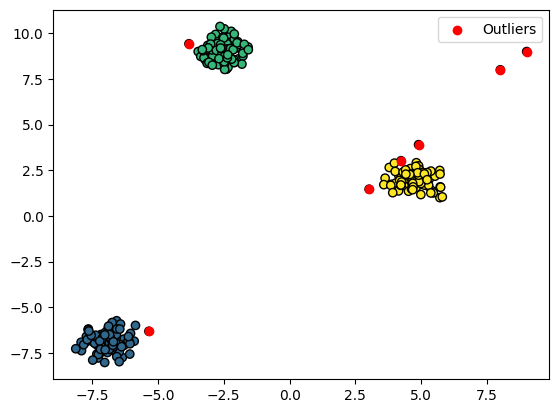

Outliers:
 [[ 4.23076849  3.01936332]
 [ 4.89740268  3.89953543]
 [-5.34018679 -6.32032214]
 [-3.81907018  9.42523738]
 [ 3.01924517  1.46097586]
 [ 8.          8.        ]
 [ 9.          9.        ]]


In [30]:
#- **Implementation**:

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
outliers = np.array([[8, 8], [9, 9]])  # Add outliers
data = np.vstack([data, outliers])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

# Identify outliers (noise points are labeled as -1)
outlier_points = data[labels == -1]

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', label='Outliers')
plt.legend()
plt.show()

print("Outliers:\n", outlier_points)

#### **2. Local Outlier Factor (LOF)**

- **How it works**:
- LOF computes the **local density** of each point relative to its neighbors.
- A point is an outlier if its density is much lower than the densities of its neighbors.

- **Steps**:
1. Choose the number of neighbors (\($k$\)).
2. Calculate the local density for each point.
3. Compute the LOF score, which quantifies how isolated a point is.
4. Points with high LOF scores are considered outliers.

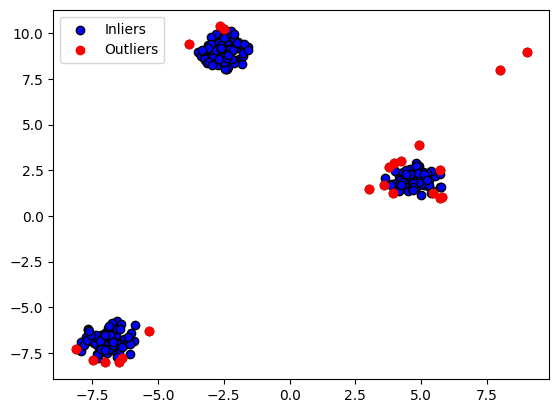

Outliers:
 [[ 4.23076849  3.01936332]
 [ 4.89740268  3.89953543]
 [ 5.70639552  0.99712578]
 [-5.34018679 -6.32032214]
 [-6.35041495 -7.75947934]
 [ 3.78331157  2.65010587]
 [-3.81907018  9.42523738]
 [-2.47908252 10.24590718]
 [-2.64152604 10.37437071]
 [ 5.70095693  2.48940231]
 [ 5.45608449  1.25809899]
 [-8.11544944 -7.27855722]
 [ 3.01924517  1.46097586]
 [ 3.97976223  2.88889907]
 [-7.01715304 -8.03107018]
 [-6.4649244  -7.98567725]
 [ 3.57793097  1.71029217]
 [-7.47125645 -7.89972568]
 [ 5.79720812  1.03953709]
 [ 3.91583667  1.2694378 ]
 [ 8.          8.        ]
 [ 9.          9.        ]]


In [31]:

#- **Implementation**:

from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
outliers = np.array([[8, 8], [9, 9]])  # Add outliers
data = np.vstack([data, outliers])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(data)

# Identify outliers (LOF labels outliers as -1)
outlier_points = data[labels == -1]

# Plot results
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Inliers', edgecolor='k')
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', label='Outliers')
plt.legend()
plt.show()

print("Outliers:\n", outlier_points)
